In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_parquet('data/dataset_features_return.parquet')
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df.shape)
df.head()

(17601669, 28)


,timestamp,ticker,news_count,title_sentiment_finbert,summary_sentiment_finbert,title_sentiment_vader,summary_sentiment_vader,topic_announcements,topic_market_movements,topic_legal_actions,...,NER_Russia,NER_Canada,NER_UK,NER_Trump,NER_ElonMusk,NER_JoeBiden,NER_FED,NER_Ukraine,NER_Japan,return_forwarded
0,2022-03-01 09:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004980
1,2022-03-01 10:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001296
2,2022-03-01 11:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010230
3,2022-03-01 12:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001927
4,2022-03-01 13:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000189


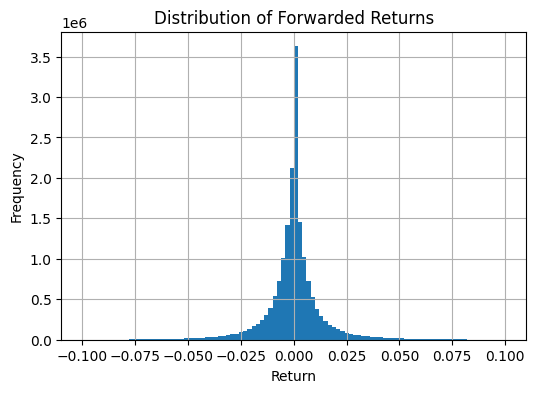

count    1.760167e+07
mean     1.075740e-04
std      1.721199e-02
min     -9.303023e-01
25%     -4.166961e-03
50%      0.000000e+00
75%      4.134938e-03
max      8.385745e+00
Name: return_forwarded, dtype: float64


In [3]:
# Plot distribution of returns
plt.figure(figsize=(6, 4))
df['return_forwarded'].hist(bins=100, range=(-0.1, 0.1)) # Adjust range and bins as needed
plt.title('Distribution of Forwarded Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['return_forwarded'].describe())

In [4]:
# Take average of sentiment columns

sentiment_cols = ['title_sentiment_finbert', 'summary_sentiment_finbert', 'title_sentiment_vader', 'summary_sentiment_vader']
df['sentiment'] = df[sentiment_cols].mean(axis=1)
df.drop(columns=sentiment_cols, inplace=True)

df.head()

,timestamp,ticker,news_count,topic_announcements,topic_market_movements,topic_legal_actions,topic_investment_sentiment,topic_earnings,topic_analyst_ratings,topic_macro_econ,...,NER_Canada,NER_UK,NER_Trump,NER_ElonMusk,NER_JoeBiden,NER_FED,NER_Ukraine,NER_Japan,return_forwarded,sentiment
0,2022-03-01 09:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004980,NaN
1,2022-03-01 10:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001296,NaN
2,2022-03-01 11:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010230,NaN
3,2022-03-01 12:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001927,NaN
4,2022-03-01 13:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000189,NaN


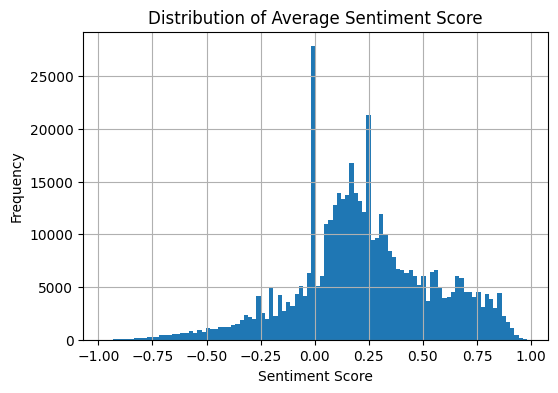

count    457470.000000
mean          0.228052
std           0.314153
min          -0.972733
25%           0.040778
50%           0.209276
75%           0.427021
max           0.981125
Name: sentiment, dtype: float64


In [5]:
# Plot distribution of the calculated sentiment score
plt.figure(figsize=(6, 4))
df['sentiment'].hist(bins=100)
plt.title('Distribution of Average Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df['sentiment'].describe())

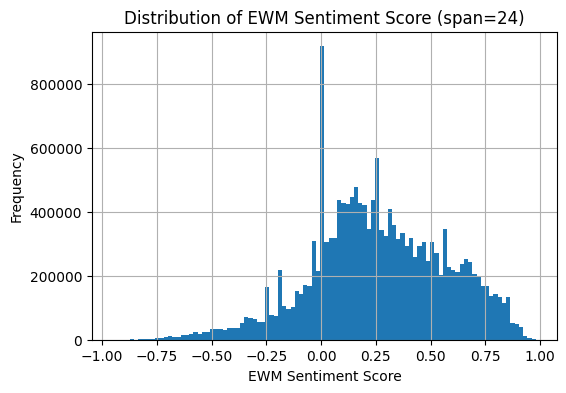

In [6]:
# Apply EWM smoothing to the sentiment score
df['sentiment_ewm'] = df.groupby('ticker')['sentiment'].transform(lambda x: x.ewm(span=24, min_periods=1).mean())

# Plot distribution of the EWM sentiment score
plt.figure(figsize=(6, 4))
df['sentiment_ewm'].hist(bins=100)
plt.title('Distribution of EWM Sentiment Score (span=24)')
plt.xlabel('EWM Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Calculate Returns

In [7]:
# Positive sentiment_ewm -> long
# Negative sentiment_ewm -> short

df['strategy_return'] = df['return_forwarded'] * df['sentiment_ewm']

df.head()

,timestamp,ticker,news_count,topic_announcements,topic_market_movements,topic_legal_actions,topic_investment_sentiment,topic_earnings,topic_analyst_ratings,topic_macro_econ,...,NER_Trump,NER_ElonMusk,NER_JoeBiden,NER_FED,NER_Ukraine,NER_Japan,return_forwarded,sentiment,sentiment_ewm,strategy_return
0,2022-03-01 09:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004980,NaN,NaN,NaN
1,2022-03-01 10:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.001296,NaN,NaN,NaN
2,2022-03-01 11:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.010230,NaN,NaN,NaN
3,2022-03-01 12:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.001927,NaN,NaN,NaN
4,2022-03-01 13:00:00,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000189,NaN,NaN,NaN


In [8]:
# Get returns per ticker
strategy_returns_pivot = df.pivot(index='timestamp', columns='ticker', values='strategy_return')

# Pivot the sentiment scores to calculate total weight per timestamp
sentiment_ewm_pivot = df.pivot(index='timestamp', columns='ticker', values='sentiment_ewm')

# Calculate the sum of abs weights for each timestamp
total_weights = sentiment_ewm_pivot.abs().sum(axis=1)

# Calculate the sum of weighted returns for each timestamp
total_weighted_returns = strategy_returns_pivot.sum(axis=1)

# Calculate the equal-weighted portfolio return for each timestamp
# Normalizes the return based on the total capital allocated
portfolio_return = total_weighted_returns / total_weights

# Handle division by zero
portfolio_return.replace([np.inf, -np.inf], 0, inplace=True)
portfolio_return.fillna(0, inplace=True)

In [9]:
portfolio_return.head(10)

timestamp
2022-03-01 04:00:00    0.000000
2022-03-01 05:00:00    0.000000
2022-03-01 06:00:00    0.000000
2022-03-01 07:00:00    0.000000
2022-03-01 08:00:00    0.005558
2022-03-01 09:00:00   -0.002968
2022-03-01 10:00:00    0.000779
2022-03-01 11:00:00    0.002722
2022-03-01 12:00:00   -0.002509
2022-03-01 13:00:00    0.002606
dtype: float64

In [10]:
total_weights.head(10)

timestamp
2022-03-01 04:00:00    0.000000
2022-03-01 05:00:00    0.000000
2022-03-01 06:00:00    0.000000
2022-03-01 07:00:00    0.000000
2022-03-01 08:00:00    1.170329
2022-03-01 09:00:00    1.170329
2022-03-01 10:00:00    2.141681
2022-03-01 11:00:00    2.481753
2022-03-01 12:00:00    2.240257
2022-03-01 13:00:00    2.989087
dtype: float64

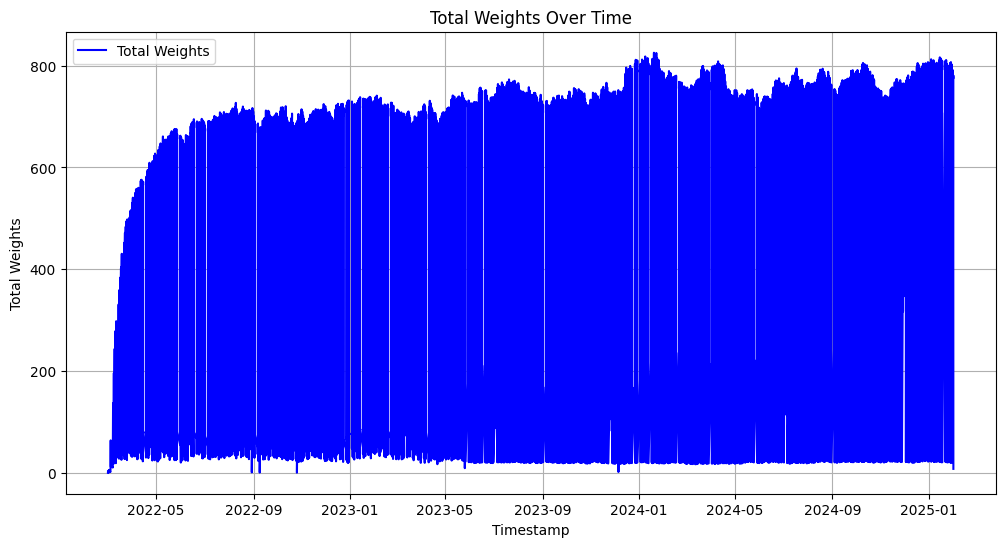

In [11]:
# Plot total_weights over time
plt.figure(figsize=(12, 6))
plt.plot(total_weights.index, total_weights.values, label='Total Weights', color='blue')
plt.title('Total Weights Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Weights')
plt.grid(True)
plt.legend()
plt.show()

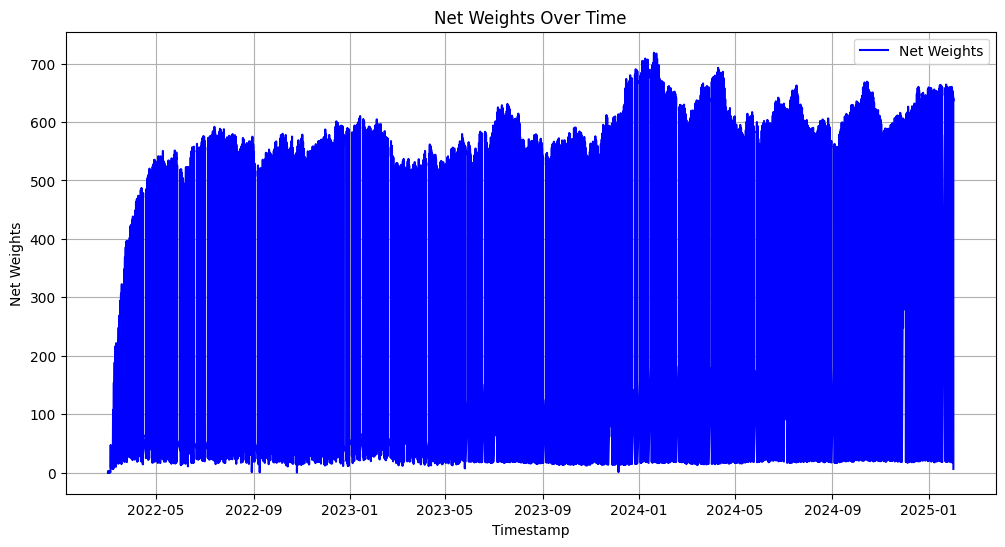

In [12]:
net_weights = sentiment_ewm_pivot.sum(axis=1)
net_weights

# plot net_weights over time
plt.figure(figsize=(12, 6))
plt.plot(net_weights.index, net_weights.values, label='Net Weights', color='blue')
plt.title('Net Weights Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Net Weights')
plt.grid(True)
plt.legend()
plt.show()

### Plot Cumulative Returns

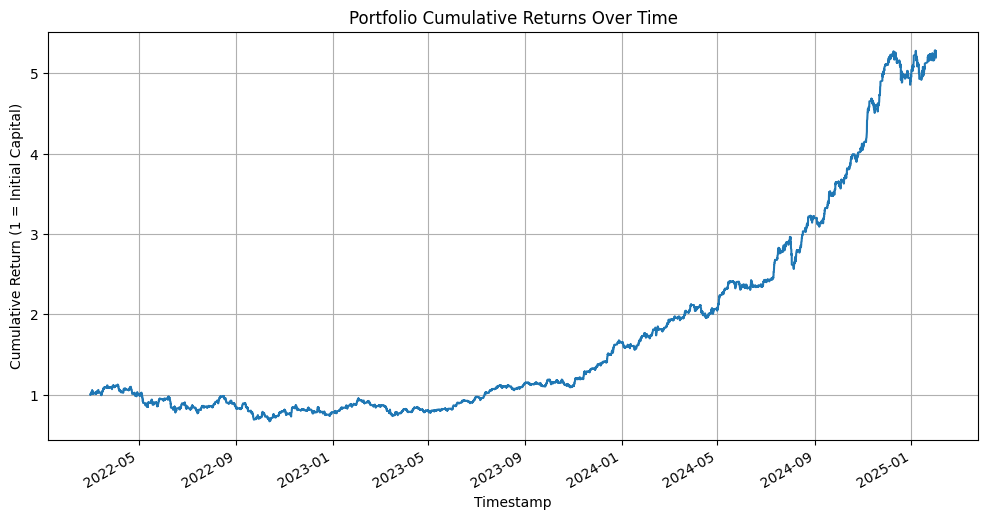

In [13]:
# Calculate cumulative returns
cumulative_returns = (1 + portfolio_return).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot(label='Strategy Cumulative Return')
plt.title('Portfolio Cumulative Returns Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Return (1 = Initial Capital)')
plt.grid(True)

### Calculate Financial Metrics

In [14]:
# Get first day and last day of backtesting
first_day = cumulative_returns.index[0]
last_day = cumulative_returns.index[-1]

In [15]:
print("Backtesting results from " + str(first_day) + " to " + str(last_day))
print("--------------")
trading_hours_per_year = 252 * 7
print("Overall Annual Sharpe Ratio: " + str(np.sqrt(trading_hours_per_year) * portfolio_return.mean() / portfolio_return.std()))
print("--------------")
print("Yearly Sharpe Ratio")
print(np.sqrt(trading_hours_per_year) * portfolio_return.groupby(portfolio_return.index.year).mean() / portfolio_return.groupby(portfolio_return.index.year).std())
print("--------------")
print("Yearly Return (%)")
print(((portfolio_return+1).groupby(portfolio_return.index.year).prod() -1)*100)
print("--------------")
print("Monthly Return (%)")
print(((portfolio_return+1).groupby(portfolio_return.index.to_period('M')).prod() -1)*100)

Backtesting results from 2022-03-01 04:00:00 to 2025-01-31 19:00:00
--------------
Overall Annual Sharpe Ratio: 1.8825915697285065
--------------
Yearly Sharpe Ratio
timestamp
2022   -0.646025
2023    2.900934
2024    4.267531
2025    1.289532
dtype: float64
--------------
Yearly Return (%)
timestamp
2022    -21.681210
2023    111.284160
2024    204.739923
2025      3.070632
dtype: float64
--------------
Monthly Return (%)
timestamp
2022-03    10.413206
2022-04    -8.937537
2022-05    -6.372750
2022-06   -10.269787
2022-07     1.173489
2022-08    -1.803026
2022-09   -14.915787
2022-10    13.482999
2022-11     2.813889
2022-12    -5.991272
2023-01    16.718338
2023-02    -5.358053
2023-03    -5.299190
2023-04    -1.909487
2023-05     2.340160
2023-06    18.499305
2023-07    14.942575
2023-08     2.089721
2023-09     3.878648
2023-10    -6.228961
2023-11    21.510200
2023-12    22.244941
2024-01     4.909106
2024-02    10.090738
2024-03    10.686813
2024-04    -2.337936
2024-05    14.506